In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import layers, models
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout, BatchNormalization, MaxPooling1D
import tensorflow as tf
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from keras.callbacks import CSVLogger, ModelCheckpoint
from keras.utils import to_categorical
import keras

In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/archive/mitbih_train.csv', header = None)
test_data = pd.read_csv('/content/drive/MyDrive/archive/mitbih_test.csv', header = None)
abnormal = pd.read_csv('/content/drive/MyDrive/archive/ptbdb_abnormal.csv', header = None)
normal = pd.read_csv('/content/drive/MyDrive/archive/ptbdb_normal.csv', header = None)

In [4]:
print('train shape:', train_data.shape,
      'test shape: ', test_data.shape,
      'abnormal shape: ', abnormal.shape,
      'normal shape: ', normal.shape)

train shape: (87554, 188) test shape:  (21892, 188) abnormal shape:  (10506, 188) normal shape:  (4046, 188)


In [5]:
train_label = train_data[187].astype(int)
test_label = test_data[187].astype(int)
train_info = train_data.iloc[:,:187]
test_info = test_data.iloc[:,:187]

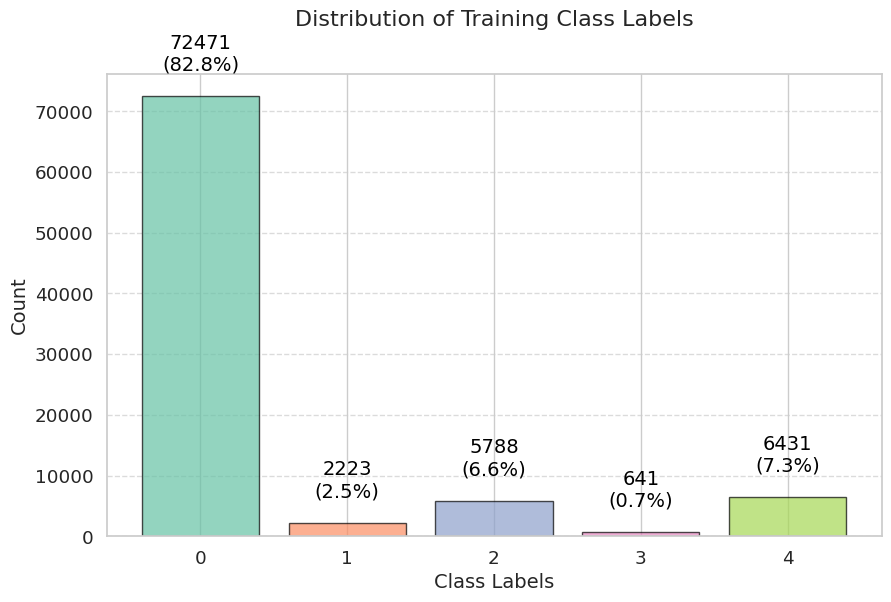

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Count elements of each class
unique_classes, class_counts = np.unique(train_label, return_counts=True)

colors = sns.color_palette("Set2", len(unique_classes))
sns.set(style="whitegrid", font_scale=1.2)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(unique_classes, class_counts, align='center', alpha=0.7, color=colors, edgecolor='black')

# Put the counting on top of the bars
for bar, count in zip(bars, class_counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.05 * max(class_counts),
            f'{count}\n({100 * count / len(train_label):.1f}%)',
            ha='center', va='bottom', fontsize=14, color='black')

plt.xlabel('Class Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Training Class Labels', fontsize=16, pad = 35)
ax.set_xticks(unique_classes)
ax.tick_params(axis='x', which='both', bottom=False)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()


In [7]:
# Count elements
unique_classes, class_counts = np.unique(train_label, return_counts=True)

# Find class with least elements
min_class = unique_classes[np.argmin(class_counts)]

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Resample the data
train_data_resampled, train_label_resampled = smote.fit_resample(train_info, train_label)

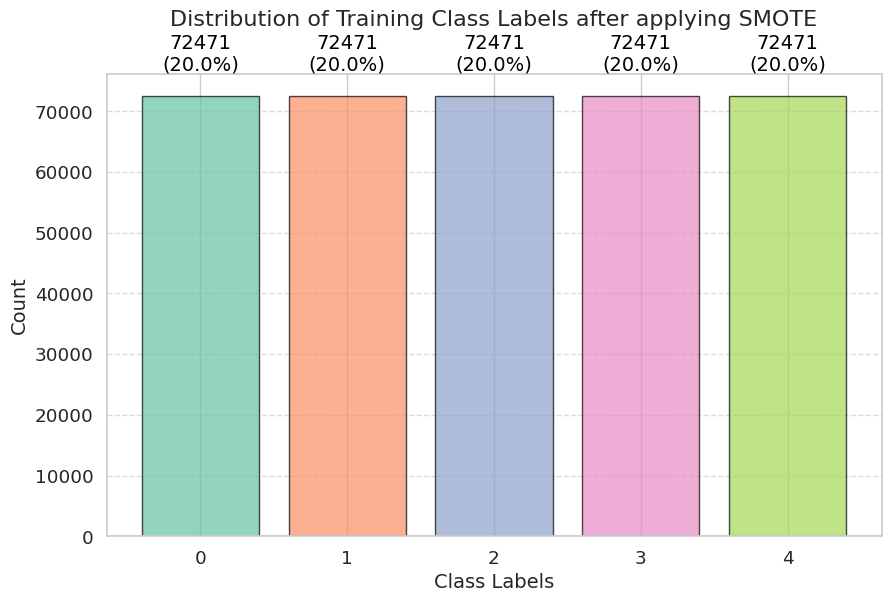

In [8]:
# Count elements
unique_classes, class_counts = np.unique(train_label_resampled, return_counts=True)

colors = sns.color_palette("Set2", len(unique_classes))
sns.set(style="whitegrid", font_scale=1.2)


fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(unique_classes, class_counts, align='center', alpha=0.7, color=colors, edgecolor='black')

for bar, count in zip(bars, class_counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.05 * max(class_counts),
            f'{count}\n({100 * count / len(train_label_resampled):.1f}%)',
            ha='center', va='bottom', fontsize=14, color='black')

plt.xlabel('Class Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Training Class Labels after applying SMOTE', fontsize=16, pad=35)
ax.set_xticks(unique_classes)
ax.tick_params(axis='x', which='both', bottom=False)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [27]:
model = DecisionTreeClassifier(random_state=42)

In [28]:
model.fit(train_data_resampled, train_label_resampled)

DecisionTreeClassifier(random_state=42)

In [29]:
y_pred = model.predict(test_data.iloc[:,:187])

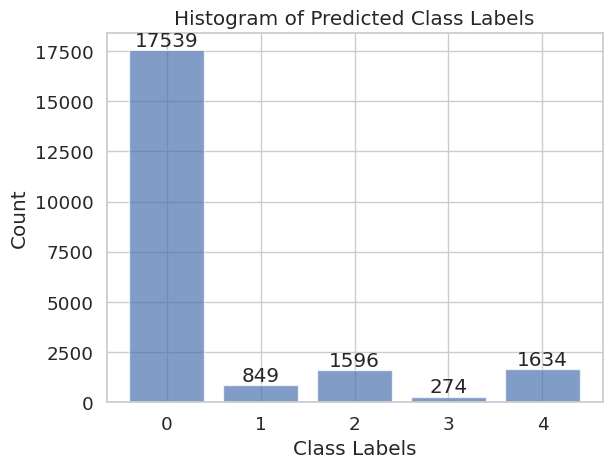

In [30]:
# Count the occurrences of each class
unique_classes, class_counts = np.unique(y_pred, return_counts=True)

# Plotting the histogram with count values on top of each bar
plt.bar(unique_classes, class_counts, align='center', alpha=0.7)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Histogram of Predicted Class Labels')

# Adding count values on top of each bar
for i, count in zip(unique_classes, class_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

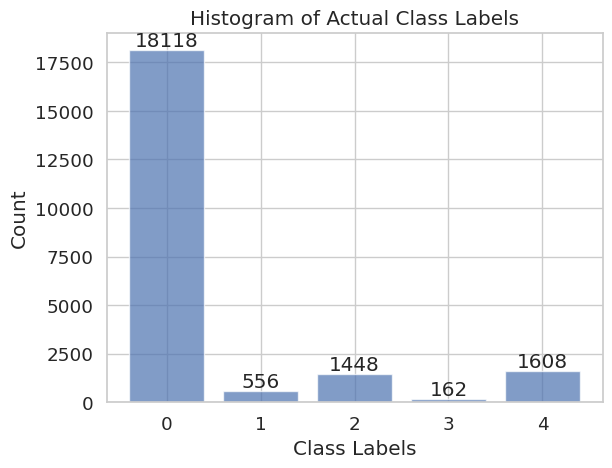

In [31]:
# Count the occurrences of each class
unique_classes, class_counts = np.unique(test_label, return_counts=True)

# Plotting the histogram with count values on top of each bar
plt.bar(unique_classes, class_counts, align='center', alpha=0.7)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Histogram of Actual Class Labels')

# Adding count values on top of each bar
for i, count in zip(unique_classes, class_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

In [32]:
acc = accuracy_score(y_pred, test_label)

In [33]:
print(acc)

0.9408002923442353


In [34]:
acc_multi = classification_report(y_pred, test_label)

In [35]:
print(acc_multi)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     17539
           1       0.75      0.49      0.59       849
           2       0.90      0.82      0.85      1596
           3       0.73      0.43      0.55       274
           4       0.94      0.93      0.94      1634

    accuracy                           0.94     21892
   macro avg       0.86      0.73      0.78     21892
weighted avg       0.94      0.94      0.94     21892



In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_data_resampled, train_label_resampled, test_size=0.01, random_state=42)

In [ ]:
def model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(187, 1)))
    model.add(BatchNormalization())

    # adding a pooling layer
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(187, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(187, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(5, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
y_train1 = to_categorical(y_train)
y_val1 = to_categorical(y_val)

In [ ]:
x_train = np.array(X_train).reshape(len(X_train),X_train.shape[1],1)
x_val = np.array(X_val).reshape(len(X_val),X_val.shape[1],1)

In [ ]:
model = model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 187, 64)           448       
                                                                 
 batch_normalization (Batch  (None, 187, 64)           256       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 94, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 94, 64)            24640     
                                                                 
 batch_normalization_1 (Bat  (None, 94, 64)            256       
 chNormalization)                                                
                                                        

In [ ]:
logger = CSVLogger('logs.csv', append=True)
his = model.fit(x_train, y_train1, epochs=50, batch_size=32,
          validation_data=(x_val, y_val1), callbacks=[logger])

Epoch 1/50
11211/11211 [==============================] - 85s 7ms/step - loss: 0.0923 - accuracy: 0.9683 - val_loss: 0.0457 - val_accuracy: 0.9837
Epoch 2/50
11211/11211 [==============================] - 77s 7ms/step - loss: 0.0336 - accuracy: 0.9890 - val_loss: 0.0292 - val_accuracy: 0.9887
Epoch 3/50
11211/11211 [==============================] - 77s 7ms/step - loss: 0.0236 - accuracy: 0.9925 - val_loss: 0.0264 - val_accuracy: 0.9903
Epoch 4/50
11211/11211 [==============================] - 77s 7ms/step - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.0164 - val_accuracy: 0.9942
Epoch 5/50
11211/11211 [==============================] - 77s 7ms/step - loss: 0.0145 - accuracy: 0.9955 - val_loss: 0.0128 - val_accuracy: 0.9953
Epoch 6/50
11211/11211 [==============================] - 79s 7ms/step - loss: 0.0127 - accuracy: 0.9963 - val_loss: 0.0145 - val_accuracy: 0.9964
Epoch 7/50
11211/11211 [==============================] - 78s 7ms/step - loss: 0.0107 - accuracy: 0.9967 - val_loss: 0

In [ ]:
y_pred1 = np.argmax(model.predict(test_data.iloc[:,:187]), axis =1)

685/685 [==============================] - 2s 4ms/step


In [ ]:
y_pred1

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
acc_multi1 = classification_report(y_pred1, test_label)

In [ ]:
print(acc_multi1)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18062
           1       0.86      0.81      0.83       586
           2       0.96      0.97      0.96      1435
           3       0.85      0.67      0.75       206
           4       0.99      0.99      0.99      1603

    accuracy                           0.98     21892
   macro avg       0.93      0.89      0.91     21892
weighted avg       0.98      0.98      0.98     21892



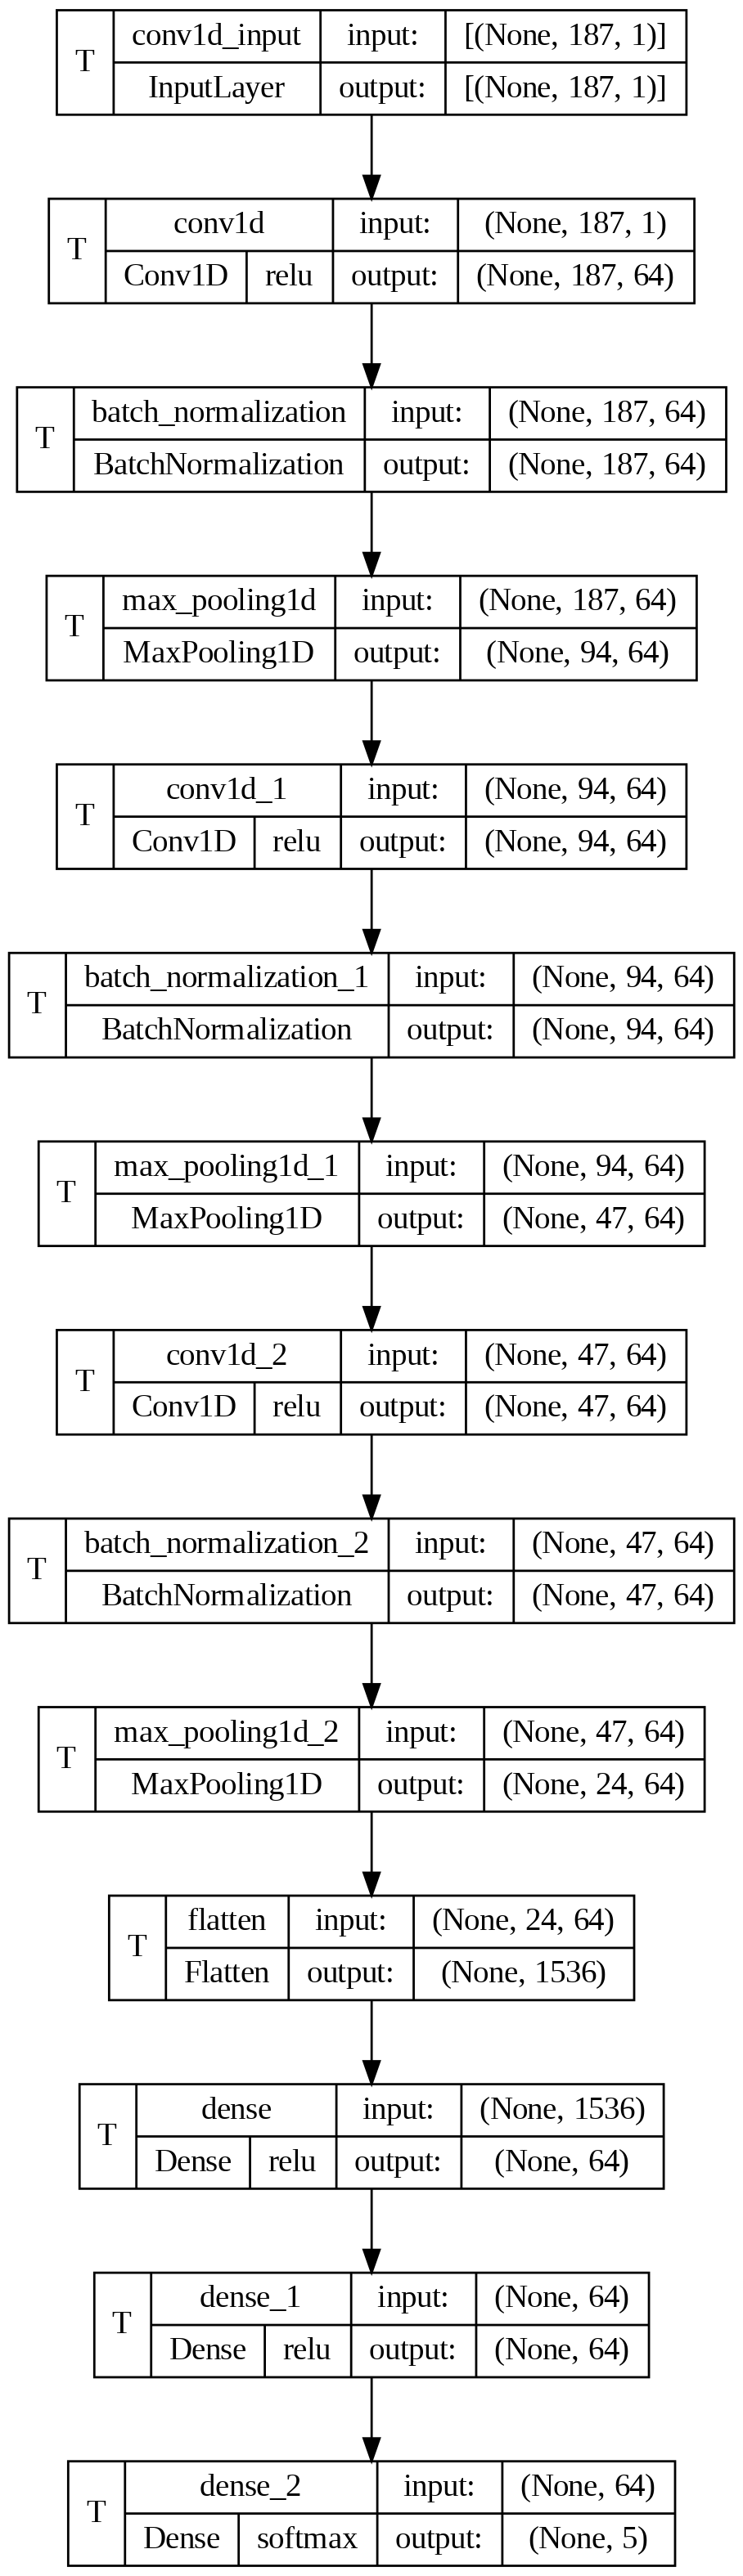

In [ ]:
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=200,
    show_layer_activations=True,
    show_trainable=True
)